In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score

In [61]:
income= pd.read_csv("../data/raw/income_and_pop.csv")
crime = pd.read_csv("../data/curated/crime_data.csv")

In [62]:
crime = crime.rename({'Offence Count': 'offence_count'}, axis=1)

In [63]:
crime

,Year,SA2_codes,Postcode,offence_count
0,2013,206011106,3057,156
1,2013,206011107,3052,552
2,2013,206011107,3055,229
3,2013,206011109,3044,514
4,2013,206011495,3056,732
...,...,...,...,...
1795,2022,214011370,3201,675
1796,2022,214011371,3199,2994
1797,2022,214011372,3200,437
1798,2022,214011374,3910,344


In [64]:
income = income.drop('geometry', axis=1)

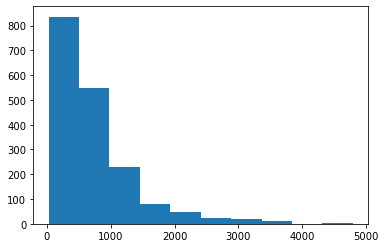

In [65]:
plt.hist(y_crime)
plt.show()

In [66]:
X_crime = crime.drop('offence_count', axis=1) 
y_crime = crime['offence_count']


# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, test_size=0.2,
                                                    random_state=42)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test) 


In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

348555.8195716297

In [68]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error
import math
print("lm", math.sqrt(mean_squared_error(y_test, y_pred)))
print("dummy", math.sqrt(mean_squared_error(y_test, y_pred_dummy)))

lm 590.3861613991555
dummy 614.8282385802795


In [70]:
# linear model performed poorly because the data is not normal
# doing random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=0)
rfr.fit(X_train, y_train)
y_pred_rf = rfr.predict(X_test)


print(np.mean(y_pred_rf))
print(np.var(y_pred_rf))
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
#print(F"MAE  = {mean_absolute_error(y_test, y_pred)}")

734.3243184498476
364677.52114272997
RMSE = 208.55454951448374


In [71]:
# future year forecast
# group by year
df = crime.groupby(["Year"]).sum().reset_index()
year = df[["Year"]].to_numpy()
year = year[:-1]  # remove 2022 cos it's not complete yet
print(year)
count = df[["offence_count"]].to_numpy()
count = count[:-1]
print(count)

[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]]
[[108802]
 [114858]
 [123436]
 [135534]
 [137742]
 [137217]
 [138485]
 [139221]
 [150832]]


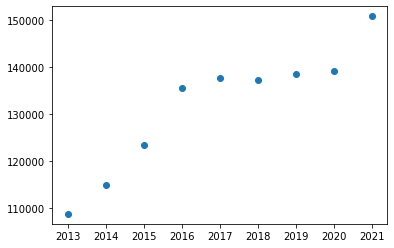

In [72]:
plt.scatter(year,count )

In [73]:
reg = linear_model.LinearRegression()
reg.fit(year, count)
reg.predict([[2023], [2024], [2025]])

array([[159090.88888889],
       [163640.72222222],
       [168190.55555556]])